In [1]:
#Assignment 11.1

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as pyplt
%matplotlib inline

In [4]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic=pd.read_csv(url)
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [149]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [148]:
byGender=titanic.groupby('sex')
#byGender.groups
colors_col=np.where(titanic.sex=='male','r','b')
colors_col
df=pd.DataFrame(data=colors_col,columns=["Colors"])
df['Age']=titanic['age']
df['Fare']=titanic['fare']
df['Gender']=titanic['sex']

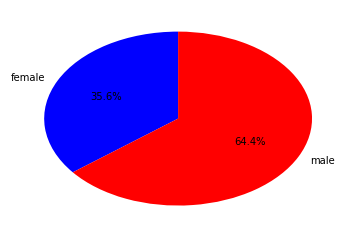

In [172]:
#1. Create a pie chart presenting the male/female proportion
genderCount=list(byGender['sex'].apply(lambda x:x.count()))
gender=list(df['Gender'].dropna().unique())
colors=df['Colors'].unique()
pyplt.pie(genderCount,labels=gender,colors=colors,startangle=90, autopct='%.1f%%')
pyplt.show()

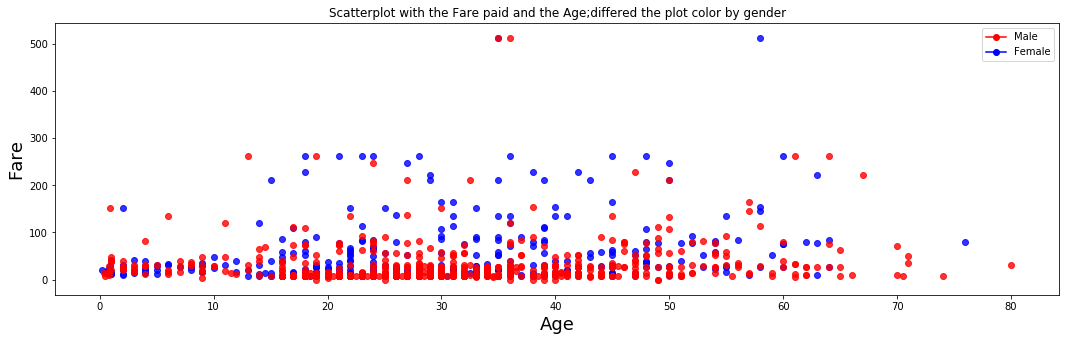

In [170]:
##2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

pyplt.figure(figsize=(18,5))
pyplt.xlabel('Age',fontsize=18)
pyplt.ylabel('Fare',fontsize=18)
pyplt.title('Scatterplot with the Fare paid and the Age;differed the plot color by gender')
colors_col=np.where(titanic.sex=='male','r','b')

for color,group in df.groupby(["Colors"]):
    pyplt.scatter(group['Age'],group['Fare'],c=color,marker='o',alpha=0.8)

marker1,=pyplt.plot([],color='r',marker='o',label='Male')
marker2,=pyplt.plot([],color='b',marker='o',label='Female')
handles=[marker1,marker2]
pyplt.legend(handles=handles)
pyplt.show()